![data-x](http://oi64.tinypic.com/o858n4.jpg)


# Super quick intro to Convolutions

#### Author: Alexander Fred Ojala

**Source:** Tensorflow docs + Hands on Machine Learning and TensorFlow

____

This notebook highlights what happens when we convolve input with feature layer (visualize activation map). 

Notebook ends with a CNN implmentation from scratch in TensorFlow. Shows that CNNs are tedious to build in native TensorFlow code.

# Convolution

 A convolution is an integral that expresses the amount of overlap of one function g as it is shifted over another function f. It therefore "blends" one function with another.
 
 ![](http://mathworld.wolfram.com/images/gifs/convrect.gif)
 
 ![](http://mathworld.wolfram.com/images/equations/Convolution/NumberedEquation1.gif)

# Matrix convolutions

![](http://deeplearning.net/software/theano/_images/numerical_padding_strides.gif)

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

# Import an image

In [3]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")

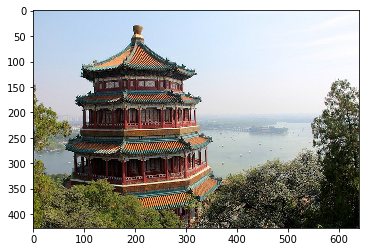

In [4]:
plt.imshow(china);

# Make it grayscale

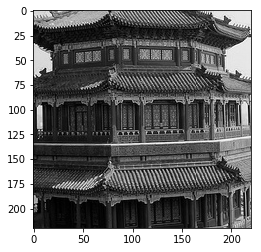

In [16]:
image = china[100:320,100:320]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)
plt.imshow(image_grayscale,cmap='gray')

# Create filters

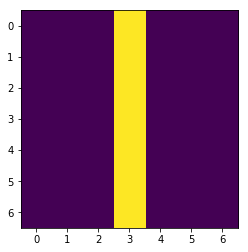

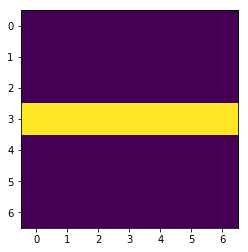

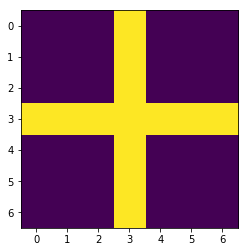

In [6]:
fmap = np.zeros(shape=(7, 7, 1, 3), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1
fmap[3, :, 0, 2] = 1
fmap[:, 3, 0, 2] = 1
plt.imshow(fmap[:, :, 0, 0])
plt.show()
plt.imshow(fmap[:, :, 0, 1])
plt.show()

plt.imshow(fmap[:, :, 0, 2])
plt.show()

# Create convolution operation

In [13]:
X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1],\
                           padding="SAME")

# Run the operation

In [14]:
with tf.Session() as sess:
    output = convolution.eval(feed_dict={X: images})

# Plot original image

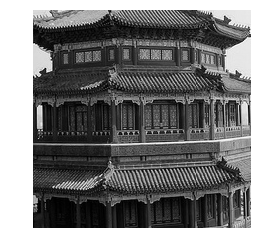

In [17]:
plt.imshow(images[0, :, :, 0],interpolation='nearest', cmap='gray')
plt.axis('off');

In [18]:
in2 = images[0, :, :, 0] # save the first image
in2 = in2.reshape(1,220,220,1)

# Vertical convolution

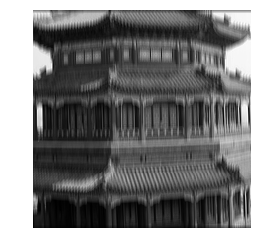

In [19]:
plt.imshow(output[0, :, :, 0],interpolation='nearest', cmap='gray')
plt.axis('off');

# Horizontal filter

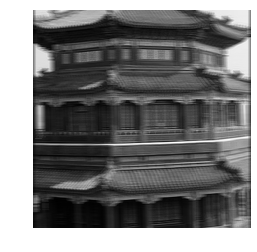

In [20]:
plt.imshow(output[0, :, :, 1],interpolation='nearest', cmap='gray')
plt.axis('off');

# Cross-filter

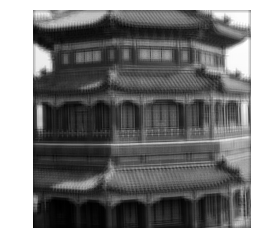

In [21]:
plt.imshow(output[0, :, :, 2],interpolation='nearest', cmap='gray')
plt.axis('off');

# Gaussian Blur

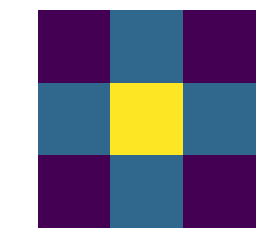

In [22]:
blur = np.array([[1,2,1],[2,4,2],[1,2,1]])
plt.imshow(blur)
plt.axis('off');
blur = tf.constant(blur,shape=[3,3,1,1],dtype=tf.float32)

X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
convolution = tf.nn.conv2d(X, blur, strides=[1,1,1,1], padding="SAME")

with tf.Session() as sess:
    output = convolution.eval(feed_dict={X: in2})
    

in3 = output

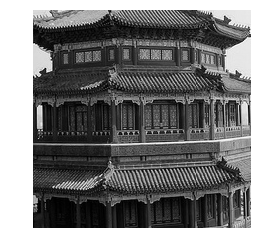

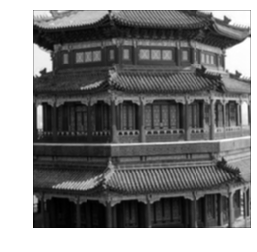

In [23]:
plt.imshow(in2[0,:,:,0],interpolation='nearest', cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(output[0,:,:,0],interpolation='nearest', cmap='gray')
plt.axis('off');

### Examples of different kernels
https://en.wikipedia.org/wiki/Kernel_(image_processing)